In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
trainer=pd.read_csv('train.csv')

In [3]:
trainer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
trainer['Age'].dtype

dtype('O')

In [5]:
type(trainer['Age'])

pandas.core.series.Series

In [6]:
trainer.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [7]:
trainer.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
gender=pd.get_dummies(trainer['Gender'],drop_first=True)

In [9]:
trainer.drop('Gender',axis=1,inplace=True)

In [10]:
trainer=pd.concat([trainer,gender],axis=1)

In [11]:
trainer.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M
0,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [12]:
def categorize_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    elif age == '55+':
        return 7

In [13]:
trainer['age_category']=trainer['Age'].apply(lambda x: categorize_age(x))

In [14]:
trainer.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category
0,0-17,10,A,2,0,3,NaN,NaN,8370,0,1
1,0-17,10,A,2,0,1,6.0,14.0,15200,0,1
2,0-17,10,A,2,0,12,NaN,NaN,1422,0,1
3,0-17,10,A,2,0,12,14.0,NaN,1057,0,1
4,55+,16,C,4+,0,8,NaN,NaN,7969,1,7


In [15]:
trainer.drop('Age',axis=1,inplace=True)

In [16]:
trainer.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category
0,10,A,2,0,3,NaN,NaN,8370,0,1
1,10,A,2,0,1,6.0,14.0,15200,0,1
2,10,A,2,0,12,NaN,NaN,1422,0,1
3,10,A,2,0,12,14.0,NaN,1057,0,1
4,16,C,4+,0,8,NaN,NaN,7969,1,7


In [17]:
trainer.groupby(trainer['City_Category'],axis=1).describe()

City_Category


In [18]:
def city_category(city):
    if city=='A':
        return 1
    elif city=='B':
        return 2
    elif city=='C':
        return 3

In [19]:
trainer['city']=trainer['City_Category'].apply(lambda x: city_category(x))

In [20]:
trainer.drop('City_Category',axis=1,inplace=True)

In [21]:
trainer.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category,city
0,10,2,0,3,NaN,NaN,8370,0,1,1
1,10,2,0,1,6.0,14.0,15200,0,1,1
2,10,2,0,12,NaN,NaN,1422,0,1,1
3,10,2,0,12,14.0,NaN,1057,0,1,1
4,16,4+,0,8,NaN,NaN,7969,1,7,3


In [25]:
trainer.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category,city
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713,0.753105,3.496430,2.042640
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394,0.431205,1.353632,0.760211
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000,1.000000,3.000000,1.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000,1.000000,3.000000,2.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000,1.000000,4.000000,3.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,7.000000,3.000000


In [26]:
def city_time(years):
    if years=='0':
        return 0
    elif years=='1':
        return 1
    elif years=='2':
        return 2
    elif years=='3':
        return 3
    elif years=='4+':
        return 4

In [27]:
trainer['city_years']=trainer['Stay_In_Current_City_Years'].apply(lambda x: city_time(x))

In [28]:
trainer.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category,city,city_years
0,10,2,0,3,NaN,NaN,8370,0,1,1,2
1,10,2,0,1,6.0,14.0,15200,0,1,1,2
2,10,2,0,12,NaN,NaN,1422,0,1,1,2
3,10,2,0,12,14.0,NaN,1057,0,1,1,2
4,16,4+,0,8,NaN,NaN,7969,1,7,3,4


In [29]:
trainer['city_years'].dtype

dtype('int64')

In [30]:
trainer.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [31]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category,city,city_years
0,10,0,3,NaN,NaN,8370,0,1,1,2
1,10,0,1,6.0,14.0,15200,0,1,1,2
2,10,0,12,NaN,NaN,1422,0,1,1,2
3,10,0,12,14.0,NaN,1057,0,1,1,2
4,16,0,8,NaN,NaN,7969,1,7,3,4


In [32]:
trainer.fillna(0,inplace=True)

In [33]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_category,city,city_years
0,10,0,3,0.0,0.0,8370,0,1,1,2
1,10,0,1,6.0,14.0,15200,0,1,1,2
2,10,0,12,0.0,0.0,1422,0,1,1,2
3,10,0,12,14.0,0.0,1057,0,1,1,2
4,16,0,8,0.0,0.0,7969,1,7,3,4


In [34]:
tester=pd.read_csv('test.csv')

In [35]:
tester.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [36]:
tester.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [37]:
tester.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [39]:
gender=pd.get_dummies(tester['Gender'],drop_first=True)

In [40]:
tester.drop('Gender',axis=1,inplace=True)

In [41]:
tester=pd.concat([tester,gender],axis=1)

In [42]:
tester.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M
0,46-50,7,B,2,1,1,11.0,NaN,1
1,26-35,17,C,0,0,3,5.0,NaN,1
2,36-45,1,B,4+,1,5,14.0,NaN,0
3,36-45,1,B,4+,1,4,9.0,NaN,0
4,26-35,1,C,1,0,4,5.0,12.0,0


In [45]:
tester['age_category']=tester['Age'].apply(lambda x: categorize_age(x))

In [46]:
tester.drop('Age',axis=1,inplace=True)

In [47]:
tester.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category
0,7,B,2,1,1,11.0,NaN,1,5
1,17,C,0,0,3,5.0,NaN,1,3
2,1,B,4+,1,5,14.0,NaN,0,4
3,1,B,4+,1,4,9.0,NaN,0,4
4,1,C,1,0,4,5.0,12.0,0,3


In [48]:
tester['city']=tester['City_Category'].apply(lambda x: city_category(x))

In [49]:
tester.drop('City_Category',axis=1,inplace=True)

In [50]:
tester.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city
0,7,2,1,1,11.0,NaN,1,5,2
1,17,0,0,3,5.0,NaN,1,3,3
2,1,4+,1,5,14.0,NaN,0,4,2
3,1,4+,1,4,9.0,NaN,0,4,2
4,1,1,0,4,5.0,12.0,0,3,3


In [51]:
tester['city_years']=tester['Stay_In_Current_City_Years'].apply(lambda x: city_time(x))

In [52]:
tester.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [53]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city,city_years
0,7,1,1,11.0,NaN,1,5,2,2
1,17,0,3,5.0,NaN,1,3,3,0
2,1,1,5,14.0,NaN,0,4,2,4
3,1,1,4,9.0,NaN,0,4,2,4
4,1,0,4,5.0,12.0,0,3,3,1


In [54]:
tester.fillna(0,inplace=True)

In [55]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city,city_years
0,7,1,1,11.0,0.0,1,5,2,2
1,17,0,3,5.0,0.0,1,3,3,0
2,1,1,5,14.0,0.0,0,4,2,4
3,1,1,4,9.0,0.0,0,4,2,4
4,1,0,4,5.0,12.0,0,3,3,1


In [56]:
target='Purchase'

In [58]:
predictors = [x for x in trainer.columns if x not in [target]]

In [59]:
predictors

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'M',
 'age_category',
 'city',
 'city_years']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
trainer_train,tester_train,purchase_train,purchase_test=train_test_split(trainer.drop('Purchase',axis=1),trainer['Purchase'],test_size=0.2)

In [63]:
trainer_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city,city_years
63613,4,0,5,14.0,0.0,1,3,2,2
283354,0,0,2,8.0,0.0,1,3,3,4
448610,2,0,16,0.0,0.0,1,3,2,3
419270,0,0,1,2.0,15.0,1,3,2,1
168513,10,0,5,14.0,16.0,1,1,3,4


In [64]:
purchase_train.head()

63613      7189
283354     6540
448610    20771
419270    11929
168513     5267
Name: Purchase, dtype: int64

In [65]:
trainerer=pd.concat([trainer_train,purchase_train],axis=1)

In [66]:
trainerer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city,city_years,Purchase
63613,4,0,5,14.0,0.0,1,3,2,2,7189
283354,0,0,2,8.0,0.0,1,3,3,4,6540
448610,2,0,16,0.0,0.0,1,3,2,3,20771
419270,0,0,1,2.0,15.0,1,3,2,1,11929
168513,10,0,5,14.0,16.0,1,1,3,4,5267


In [67]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        #xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=('rmse'), early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Purchase'],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("MSE : %.8g" % metrics.mean_squared_error(dtrain['Purchase'].values, dtrain_predictions))
    print("RMSE (Train): %f" % np.sqrt(metrics.mean_squared_error(dtrain['Purchase'], dtrain_predictions)))
    
    feat_imp = pd.Series(alg.get_booster().get_score()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
MSE : 8565950.6
RMSE (Train): 2926.764520


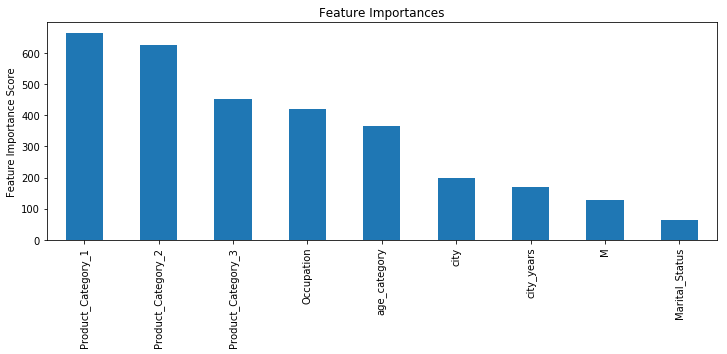

In [68]:
xgb1 = XGBRegressor(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, trainerer, predictors)

In [69]:
param_test1 = {
 'n_estimators':np.arange(240,400,10)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(trainerer[predictors],trainerer[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -8426662.81821, std: 17668.08814, params: {'n_estimators': 240},
  mean: -8420924.44682, std: 17714.73045, params: {'n_estimators': 250},
  mean: -8415344.58673, std: 18061.08502, params: {'n_estimators': 260},
  mean: -8410996.66225, std: 18109.16491, params: {'n_estimators': 270},
  mean: -8406615.69488, std: 17923.86477, params: {'n_estimators': 280},
  mean: -8400955.28422, std: 17438.13816, params: {'n_estimators': 290},
  mean: -8395780.86390, std: 17750.30939, params: {'n_estimators': 300},
  mean: -8391406.48274, std: 17688.54542, params: {'n_estimators': 310},
  mean: -8387295.58167, std: 17992.51887, params: {'n_estimators': 320},
  mean: -8381171.95055, std: 17733.29668, params: {'n_estimators': 330},
  mean: -8377468.18623, std: 17566.37187, params: {'n_estimators': 340},
  mean: -8373745.54415, std: 18017.22056, params: {'n_estimators': 350},
  mean: -8371135.99116, std: 18070.31078, params: {'n_estimators': 360},
  mean: -8367683.10297, std: 18489.83717, params: {

In [70]:
param_test2 = {
 'n_estimators':np.arange(400,800,50)
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(trainerer[predictors],trainerer[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -8358301.35861, std: 19003.43423, params: {'n_estimators': 400},
  mean: -8346698.88215, std: 19657.76202, params: {'n_estimators': 450},
  mean: -8335158.33670, std: 18982.18710, params: {'n_estimators': 500},
  mean: -8325233.03038, std: 19274.83716, params: {'n_estimators': 550},
  mean: -8316905.43308, std: 19433.70277, params: {'n_estimators': 600},
  mean: -8309867.52512, std: 20360.53183, params: {'n_estimators': 650},
  mean: -8303503.64731, std: 20900.76738, params: {'n_estimators': 700},
  mean: -8297890.90399, std: 20036.75040, params: {'n_estimators': 750}],
 {'n_estimators': 750},
 -8297890.903991858)

In [71]:
param_test3 = {
 'n_estimators':np.arange(750,1001,50)
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(trainerer[predictors],trainerer[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -8297890.90399, std: 20036.75040, params: {'n_estimators': 750},
  mean: -8292850.27904, std: 20759.48566, params: {'n_estimators': 800},
  mean: -8287419.48665, std: 21899.52980, params: {'n_estimators': 850},
  mean: -8282083.09597, std: 21829.70501, params: {'n_estimators': 900},
  mean: -8278599.37448, std: 22474.04882, params: {'n_estimators': 950},
  mean: -8275641.34798, std: 21997.25274, params: {'n_estimators': 1000}],
 {'n_estimators': 1000},
 -8275641.347983703)

In [74]:
param_test4 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,6,2)
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=1000,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(trainerer[predictors],trainerer[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -8521941.24799, std: 18057.75706, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -8521398.72524, std: 17618.62886, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -8520835.12544, std: 17753.39197, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -8275641.34798, std: 21997.25274, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -8275539.51934, std: 22185.09321, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -8275058.93778, std: 20728.06750, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -8206743.22045, std: 35254.24440, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -8204158.76300, std: 35182.59990, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -8205734.12026, std: 38836.10293, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -8452872.00342, std: 41015.54060, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -8435822.14283, std: 38420.15927, params: {'max_depth': 9, 'min_child_weight': 3},

In [75]:
param_test5 = {
 'max_depth':[6,7,8],
 'min_child_weight':[2,3,4]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=1000,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(trainerer[predictors],trainerer[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -8210517.72635, std: 28607.94655, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: -8209256.40344, std: 29301.05100, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: -8209049.64678, std: 25984.75047, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -8202133.46911, std: 34612.90946, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: -8204158.76300, std: 35182.59990, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -8202677.66192, std: 36551.80077, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: -8270188.52017, std: 39526.08320, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: -8269945.11719, std: 40335.85974, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: -8266915.72922, std: 41330.98558, params: {'max_depth': 8, 'min_child_weight': 4}],
 {'max_depth': 7, 'min_child_weight': 2},
 -8202133.469112532)

In [76]:
param_test5 = {
  'gamma':[i/10.0 for i in range(0,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=1000,
 subsample=0.8, colsample_bytree=0.8,max_depth=7,min_child_weight=2,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(trainerer[predictors],trainerer[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -8202133.46911, std: 34612.90946, params: {'gamma': 0.0},
  mean: -8202133.46911, std: 34612.90946, params: {'gamma': 0.1},
  mean: -8202133.46911, std: 34612.90946, params: {'gamma': 0.2},
  mean: -8202133.46911, std: 34612.90946, params: {'gamma': 0.3},
  mean: -8202133.46911, std: 34612.90946, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -8202133.469112532)

In [78]:
param_test6 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=1000, max_depth=7,
 min_child_weight=2,gamma=0.0, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch6.fit(trainerer[predictors],trainerer[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: -8214467.52684, std: 27767.63096, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -8204793.09031, std: 32067.54027, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -8196226.59470, std: 33421.09539, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -8186039.90028, std: 31087.88395, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -8222579.98336, std: 33115.49276, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -8211972.62126, std: 35178.04620, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -8197076.87179, std: 31068.01488, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -8186989.81161, std: 32170.21797, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -8235622.99840, std: 35420.36846, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -8217126.92315, std: 30720.21254, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -8202133.46911, std: 34612.90946, params: 


Model Report
MSE : 7667221.2
RMSE (Train): 2768.974748


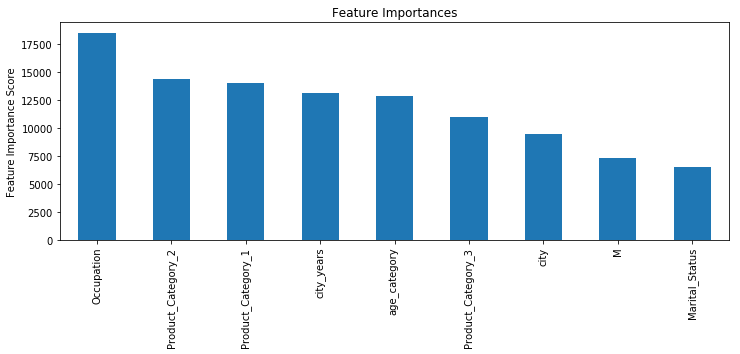

In [79]:
xgb2 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=2,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, trainerer, predictors)

In [80]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=1000, max_depth=7,
 subsample=0.9,colsample_bytree=0.6,min_child_weight=2,gamma=0.0, objective= 'reg:linear', 
 nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch7.fit(trainerer[predictors],trainerer[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: -8186245.24240, std: 31361.98184, params: {'reg_alpha': 1e-05},
  mean: -8186039.90411, std: 31087.86050, params: {'reg_alpha': 0.01},
  mean: -8187493.21070, std: 32952.27341, params: {'reg_alpha': 0.1},
  mean: -8184526.44554, std: 32434.70945, params: {'reg_alpha': 1},
  mean: -8188881.22933, std: 30628.57871, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 -8184526.445538074)


Model Report
MSE : 7686523
RMSE (Train): 2772.457929


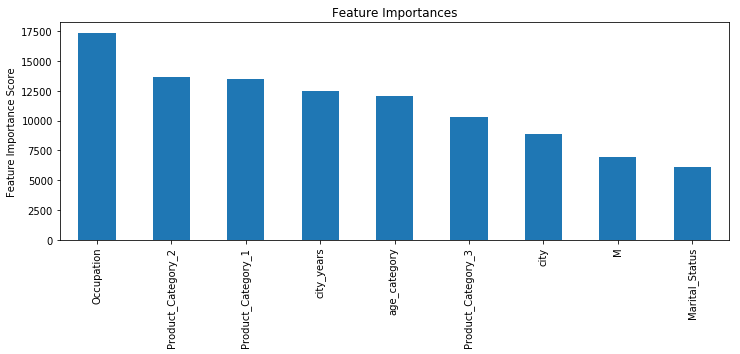

In [82]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=2,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 reg_alpha=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, trainerer, predictors)


Model Report
MSE : 7669592.5
RMSE (Train): 2769.402905


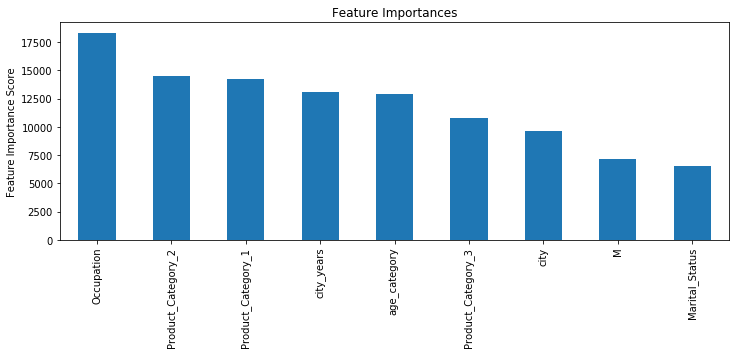

In [83]:
xgb4 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=2,
 gamma=0.0,
 reg_alpha=10,   
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, trainerer, predictors)

In [84]:
xgb2.fit(trainer_train,purchase_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=2, missing=None,
       n_estimators=892, n_jobs=1, nthread=4, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.9)

In [86]:
pred1=xgb2.predict(tester_train)

In [87]:
pred1

array([  5829.11376953,   6669.06835938,   1823.08544922, ...,
        11844.91992188,  14006.32617188,  13350.58203125], dtype=float32)

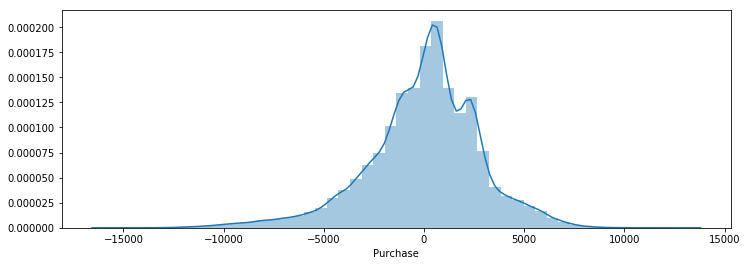

In [90]:
sns.distplot((purchase_test-pred1),bins=50);

In [89]:
import seaborn as sns

In [91]:
print('MAE:', metrics.mean_absolute_error(purchase_test, pred1))
print('MSE:', metrics.mean_squared_error(purchase_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(purchase_test, pred1)))

MAE: 2118.28572016
MSE: 8088706.43295
RMSE: 2844.0651246


In [92]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_category,city,city_years
0,7,1,1,11.0,0.0,1,5,2,2
1,17,0,3,5.0,0.0,1,3,3,0
2,1,1,5,14.0,0.0,0,4,2,4
3,1,1,4,9.0,0.0,0,4,2,4
4,1,0,4,5.0,12.0,0,3,3,1


In [93]:
predfinal=xgb2.predict(tester)

In [94]:
predfinal

array([ 14829.33789062,  11080.8359375 ,   6708.49755859, ...,
        13401.55273438,  19363.49609375,   2264.93774414], dtype=float32)

In [95]:
final=pd.read_csv('test.csv')

In [96]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [97]:
final['Purchase']=predfinal

In [98]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,14829.337891
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11080.835938
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6708.497559
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2620.724609
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2771.849121


In [99]:
final.to_csv('resxgb2.csv')


Model Report
MSE : 7852263.3
RMSE (Train): 2802.189023


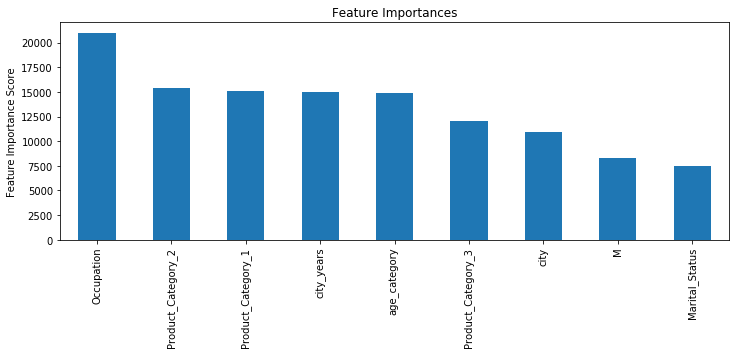

In [101]:
xgb6 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=2,
 gamma=0.0,
 reg_alpha=10,   
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb6, trainerer, predictors)


Model Report
MSE : 7712041.1
RMSE (Train): 2777.056199


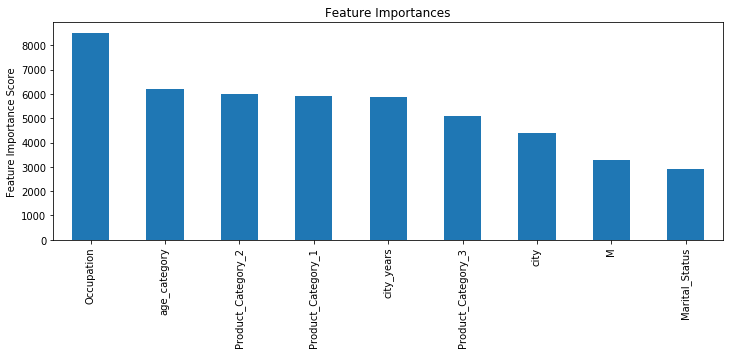

In [104]:
xgb5 = XGBRegressor(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=2,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb5, trainerer, predictors)